### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
file_path = 'c:/Users/gregp/Desktop/coupons.csv'

In [9]:
data = pd.read_csv(file_path)

In [10]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [13]:
missing_data_summary = data.isnull().sum()

In [14]:
columns_with_missing_data = missing_data_summary[missing_data_summary > 0]

In [15]:
def plot_missing_data(data, columns_with_missing):
    fig, ax = plt.subplots(len(columns_with_missing), 1, figsize=(10, 15))
    for i, col in enumerate(columns_with_missing.index):
        data[col].isnull().value_counts().plot(kind='bar', ax=ax[i], color=['blue', 'orange'])
        ax[i].set_title(f'Missing Values in {col}')
        ax[i].set_xticklabels(['Not Missing', 'Missing'], rotation=0)
    plt.tight_layout()
    plt.show()

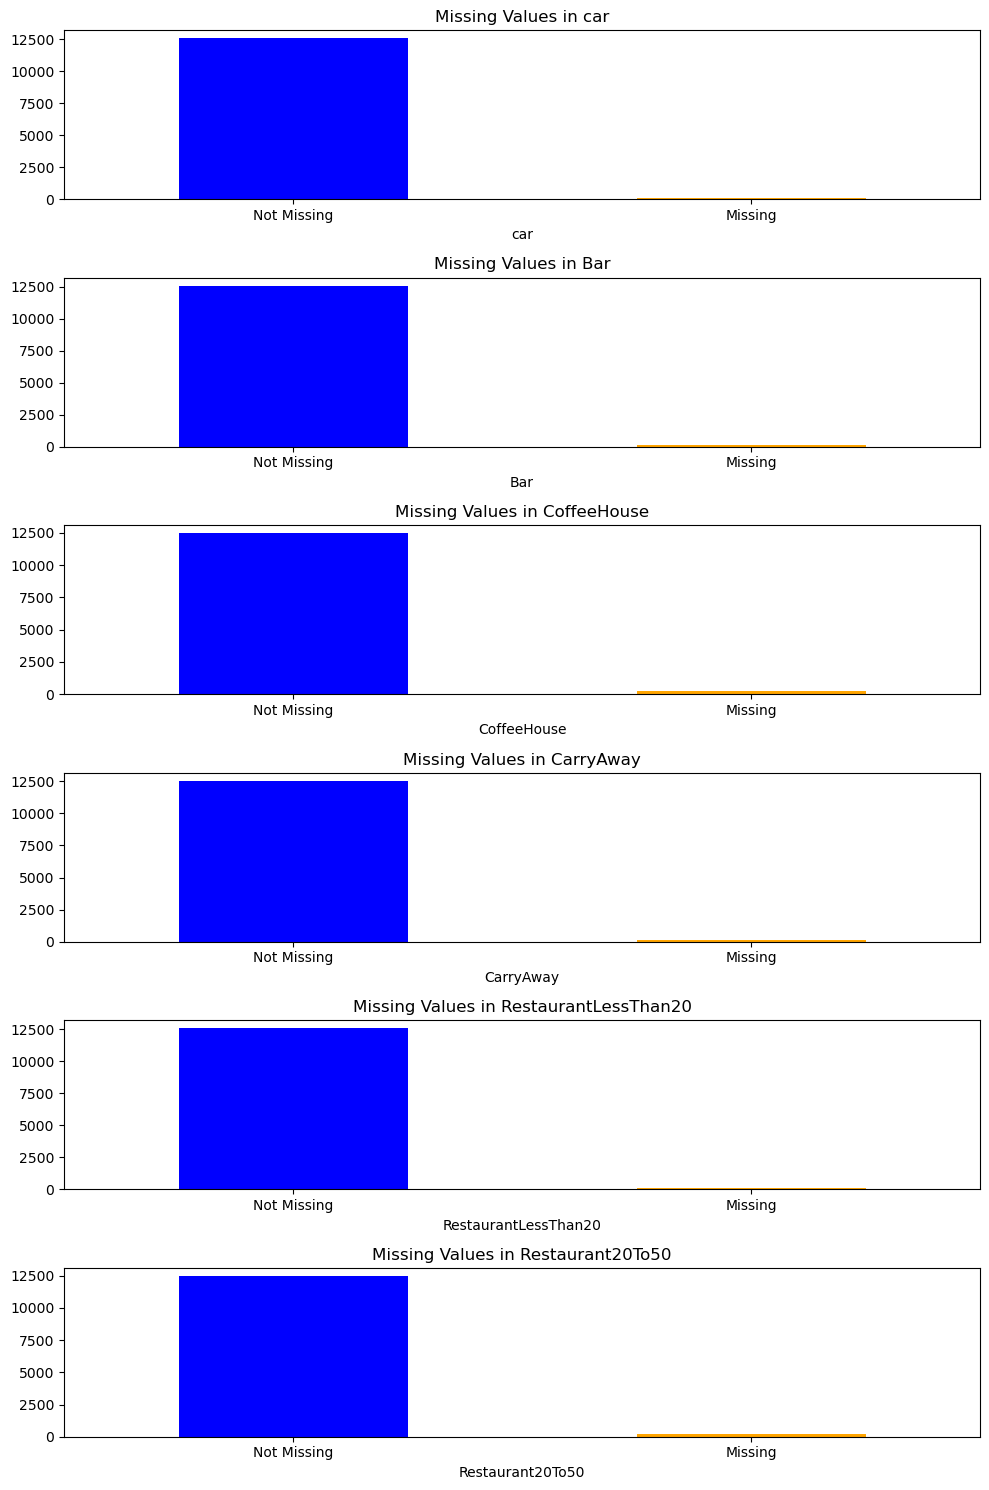

In [17]:
plot_missing_data(data, columns_with_missing_data)

In [19]:
proportion_missing = (columns_with_missing_data / len(data)) * 100

In [20]:
print(proportion_missing)

car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
dtype: float64


3. Decide what to do about your missing data -- drop, replace, other...

In [21]:
data = data.drop(columns=['car'])

In [23]:
columns_to_impute = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in columns_to_impute:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

In [24]:
remaining_missing_data = data.isnull().sum()

In [25]:
print("Remaining Missing Data After Imputation:")

Remaining Missing Data After Imputation:


In [26]:
print(remaining_missing_data)

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



In [33]:
total_observations = len(data)

In [34]:
accepted_coupons = data['Y'].sum()

In [35]:
proportion_accepted = accepted_coupons / total_observations

In [36]:
print(f"Proportion of observations that accepted the coupon: {proportion_accepted:.2f}")

Proportion of observations that accepted the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

In [37]:
coupon_counts = data['coupon'].value_counts()

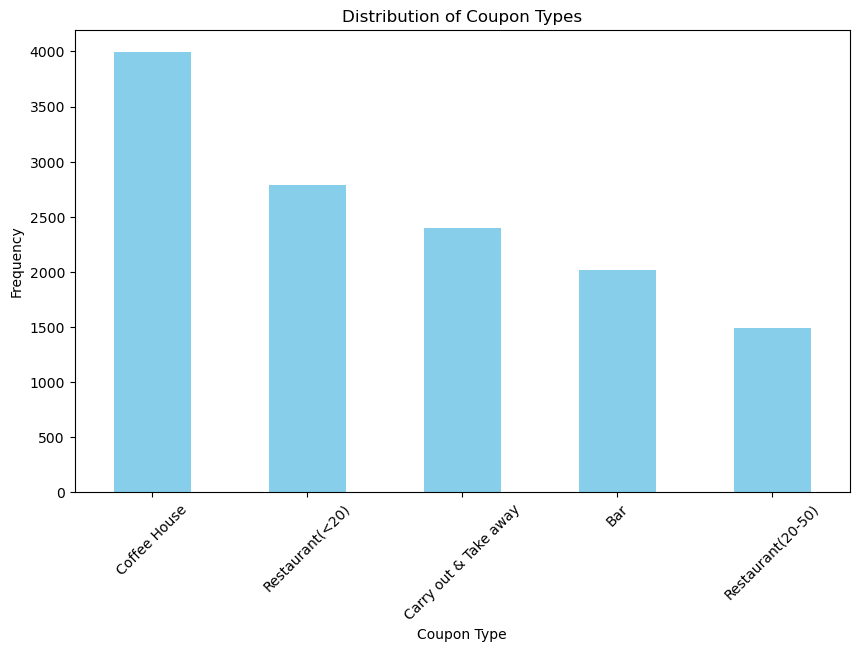

In [38]:
plt.figure(figsize=(10, 6))
coupon_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

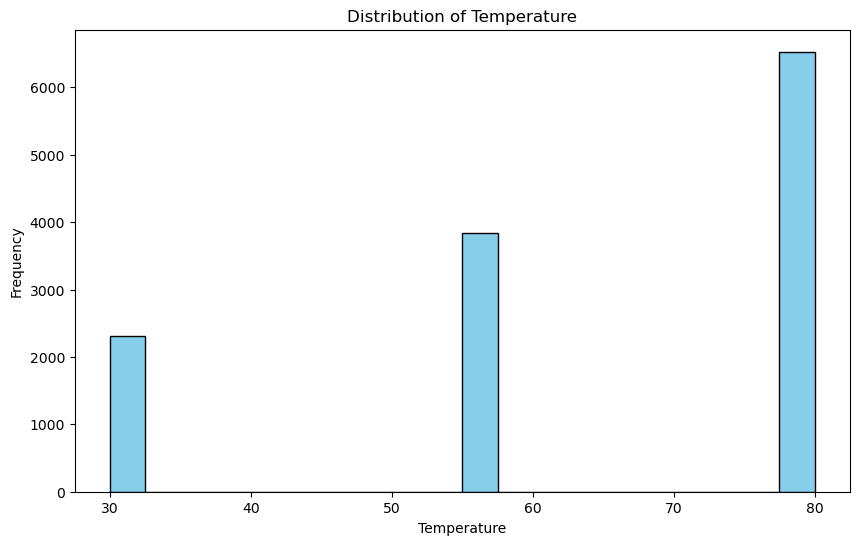

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(data['temperature'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [40]:
bar_coupons_df = data[data['coupon'] == 'Bar']

In [41]:
bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [42]:
total_bar_coupons = len(bar_coupons_df)

In [43]:
accepted_bar_coupons = bar_coupons_df['Y'].sum()

In [44]:
proportion_accepted_bar_coupons = accepted_bar_coupons / total_bar_coupons

In [45]:
print(f"Proportion of bar coupons that were accepted: {proportion_accepted_bar_coupons:.2f}")

Proportion of bar coupons that were accepted: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [46]:
few_visits = bar_coupons_df['Bar'].isin(['never', 'less1', '1~3'])

In [47]:
more_visits = bar_coupons_df['Bar'].isin(['4~8', 'gt8'])

In [48]:
few_visits_df = bar_coupons_df[few_visits]

In [49]:
more_visits_df = bar_coupons_df[more_visits]

In [50]:
acceptance_rate_few_visits = few_visits_df['Y'].mean()

In [51]:
acceptance_rate_more_visits = more_visits_df['Y'].mean()

In [52]:
acceptance_rate_few_visits, acceptance_rate_more_visits, f"Acceptance rate (3 or fewer visits): {acceptance_rate_few_visits:.2f}", f"Acceptance rate (more than 3 visits): {acceptance_rate_more_visits:.2f}"

(0.37073707370737075,
 0.7688442211055276,
 'Acceptance rate (3 or fewer visits): 0.37',
 'Acceptance rate (more than 3 visits): 0.77')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [57]:
bar_coupons_df['age'] = bar_coupons_df['age'].replace({'50plus': 50, 'below21': 20}).astype(int)

C:\Users\gregp\AppData\Local\Temp\ipykernel_19780\1853221900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['age'] = bar_coupons_df['age'].replace({'50plus': 50, 'below21': 20}).astype(int)


In [58]:
more_than_once_bar_and_over_25 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_df['age'] > 25)]

In [59]:
all_others = bar_coupons_df[~((bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_df['age'] > 25))]

In [60]:
acceptance_rate_more_than_once_bar_and_over_25 = more_than_once_bar_and_over_25['Y'].mean()

In [61]:
acceptance_rate_all_others = all_others['Y'].mean()

In [62]:
print(f"Acceptance rate (more than once a month and over 25): {acceptance_rate_more_than_once_bar_and_over_25:.2f}")

Acceptance rate (more than once a month and over 25): 0.70


In [63]:
print(f"Acceptance rate (all others): {acceptance_rate_all_others:.2f}")

Acceptance rate (all others): 0.34


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [64]:
bar_more_than_once = bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])

In [65]:
passenger_not_kid = bar_coupons_df['passanger'] != 'Kid(s)'

In [66]:
occupation_not_farming_fishing_forestry = ~bar_coupons_df['occupation'].isin(['Farming, Fishing, & Forestry'])

In [67]:
specified_conditions = bar_more_than_once & passenger_not_kid & occupation_not_farming_fishing_forestry

In [68]:
group_1 = bar_coupons_df[specified_conditions]

In [69]:
group_2 = bar_coupons_df[~specified_conditions]

In [70]:
acceptance_rate_group_1 = group_1['Y'].mean()

In [71]:
acceptance_rate_group_2 = group_2['Y'].mean()

In [72]:
acceptance_rate_group_1, acceptance_rate_group_2, f"Acceptance rate (specified conditions): {acceptance_rate_group_1:.2f}", f"Acceptance rate (all others): {acceptance_rate_group_2:.2f}"

(0.7132486388384754,
 0.296043656207367,
 'Acceptance rate (specified conditions): 0.71',
 'Acceptance rate (all others): 0.30')

# Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: 0.71 (71.32%).
# Acceptance rate for all other drivers: 0.30 (29.60%).

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [73]:
condition_1 = (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_df['passanger'] != 'Kid(s)') & (bar_coupons_df['maritalStatus'] != 'Widowed')

In [74]:
condition_2 = (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_df['age'] < 30)

In [77]:
def income_to_midpoint(income_str):
    if 'Less than' in income_str:
        return 6250  # Use 6250 as the midpoint for "Less than 12500"
    if '-' in income_str:
        low, high = income_str.replace('$', '').replace(',', '').split(' - ')
        return (int(low) + int(high)) // 2
    elif 'or More' in income_str:
        return 100000  # Use 100000 as the midpoint for "100000 or More"
    return int(income_str.replace('$', '').replace(',', ''))

In [78]:
bar_coupons_df.loc[:, 'income'] = bar_coupons_df['income'].apply(income_to_midpoint)

In [79]:
condition_3 = (bar_coupons_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (bar_coupons_df['income'] < 50000)

In [80]:
group_1 = bar_coupons_df[condition_1 | condition_2 | condition_3]

In [81]:
group_2 = bar_coupons_df[~(condition_1 | condition_2 | condition_3)]

In [82]:
acceptance_rate_group_1 = group_1['Y'].mean()

In [83]:
acceptance_rate_group_2 = group_2['Y'].mean()

In [84]:
acceptance_rate_group_1, acceptance_rate_group_2, f"Acceptance rate (specified conditions): {acceptance_rate_group_1:.2f}", f"Acceptance rate (all others): {acceptance_rate_group_2:.2f}"

(0.5889175257731959,
 0.29814665592264306,
 'Acceptance rate (specified conditions): 0.59',
 'Acceptance rate (all others): 0.30')

# Acceptance rate for drivers who meet the specified conditions: 0.59 (58.89%)
# Acceptance rate for all other drivers: 0.30 (29.81%)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who are frequent bar visitors, younger, have lower incomes, are not widowed, and tend to dine out at cheaper restaurants with adult companions are more likely to accept bar coupons. These drivers likely have a more social and outgoing lifestyle, enjoy cost-saving offers, and are more inclined to participate in bar-related activities.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [85]:
coffee_coupons_df = data[data['coupon'] == 'Coffee House']

In [86]:
coffee_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


In [87]:
missing_data_summary = coffee_coupons_df.isnull().sum()

In [88]:
columns_with_missing_data = missing_data_summary[missing_data_summary > 0]


In [89]:
columns_with_missing_data

Series([], dtype: int64)

In [90]:
total_coffee_coupons = len(coffee_coupons_df)

In [91]:
accepted_coffee_coupons = coffee_coupons_df['Y'].sum()

In [92]:
proportion_accepted_coffee_coupons = accepted_coffee_coupons / total_coffee_coupons

In [93]:
proportion_accepted_coffee_coupons

0.49924924924924924

In [94]:
age_acceptance = coffee_coupons_df.groupby('age')['Y'].mean()

In [95]:
age_acceptance

age
21         0.524349
26         0.514828
31         0.476726
36         0.467662
41         0.501538
46         0.513636
50plus     0.420183
below21    0.696774
Name: Y, dtype: float64

In [98]:
missing_data_summary = coffee_coupons_df.isnull().sum()

In [99]:
columns_with_missing_data = missing_data_summary[missing_data_summary > 0]

In [100]:
columns_with_missing_data

Series([], dtype: int64)

In [101]:
total_coffee_coupons = len(coffee_coupons_df)

In [102]:
accepted_coffee_coupons = coffee_coupons_df['Y'].sum()

In [103]:
proportion_accepted_coffee_coupons = accepted_coffee_coupons / total_coffee_coupons

In [104]:
proportion_accepted_coffee_coupons

0.49924924924924924

In [105]:
age_acceptance = coffee_coupons_df.groupby('age')['Y'].mean()

In [106]:
age_acceptance

age
21         0.524349
26         0.514828
31         0.476726
36         0.467662
41         0.501538
46         0.513636
50plus     0.420183
below21    0.696774
Name: Y, dtype: float64

In [107]:
income_acceptance = coffee_coupons_df.groupby('income')['Y'].mean()

In [108]:
income_acceptance

income
6250      0.551948
18749     0.540404
31249     0.473438
43749     0.542373
56249     0.503650
68749     0.436364
81249     0.296610
93749     0.557196
100000    0.494382
Name: Y, dtype: float64

In [109]:
education_acceptance = coffee_coupons_df.groupby('education')['Y'].mean()

In [110]:
education_acceptance

education
Associates degree                         0.517143
Bachelors degree                          0.462774
Graduate degree (Masters or Doctorate)    0.510033
High School Graduate                      0.541219
Some High School                          0.607143
Some college - no degree                  0.515682
Name: Y, dtype: float64

In [111]:
marital_status_acceptance = coffee_coupons_df.groupby('maritalStatus')['Y'].mean()

In [112]:
marital_status_acceptance

maritalStatus
Divorced             0.523179
Married partner      0.493186
Single               0.516129
Unmarried partner    0.478382
Widowed              0.351351
Name: Y, dtype: float64

In [113]:
passenger_acceptance = coffee_coupons_df.groupby('passanger')['Y'].mean()

In [114]:
passenger_acceptance

passanger
Alone        0.437943
Friend(s)    0.596906
Kid(s)       0.483092
Partner      0.570492
Name: Y, dtype: float64

Analysis: Passengers who are accompanied by friends or partners show higher acceptance rates for Coffee House coupons, while those who are alone have the lowest acceptance rate.